In [3]:
import numpy as np
from matplotlib import pyplot as plt
import math as m

In [4]:
def fx(x):
    return 1 / (2*x*x + 1)
def If(a, b):
    return (m.atan(m.sqrt(2)*b)/m.sqrt(2)) - (m.atan(m.sqrt(2)*a)/m.sqrt(2))

In [5]:
a = -1
b = 1
If(a,b)

1.3510217177120798

In [6]:
#Функция прямоугольников для равню сетки, принимает кол-во узлов, границы и ф-цию, возвращает значе интеграллов и шаг
#Используются формулы левых, правых и средних
def Rectangle_method(n, a ,b, f): 
    h = (b-a)/(n-1)
    Ileft = f(a) #f0
    Iright = f(b) #fn
    Imean = f(a)/2 + f(b)/2 
    for i in range(1, n-1):
        Ileft = Ileft + f(a+h*i)
        Iright = Iright + f(a+h*i)
        Imean = Imean + f(a+h*i) # она же формула тропеции
    return Ileft*h, Iright*h, Imean*h, h
#Функция прямоугольников для равню сетки, принимает кол-во узлов, границы и ф-цию, возвращает значе интегралл и шаг
def Simpson_formula(n, a ,b, f):
    h = (b-a)/(n-1)
    I = 0
    for i in range(1,n-1,2):
        I = I +f(a+h*(i-1))+4*f(a+h*(i))+f(a+h*(i+1))
    return I*h /3 , h
        
    

In [7]:
H = []
errorleft = []
errorright = []
errormean = []
errorS = []
Ireal = If(a,b)
for i in range(101,1000,2):
    Ileft, Iright, Imean, h = Rectangle_method(i, a ,b, fx)
    I,h = Simpson_formula(i, a ,b, fx)
    H.append(h)
    errorleft.append(abs(Ileft - Ireal))
    errorright.append(abs(Iright - Ireal))
    errormean.append(abs(Imean - Ireal))
    errorS.append(abs(I-Ireal))

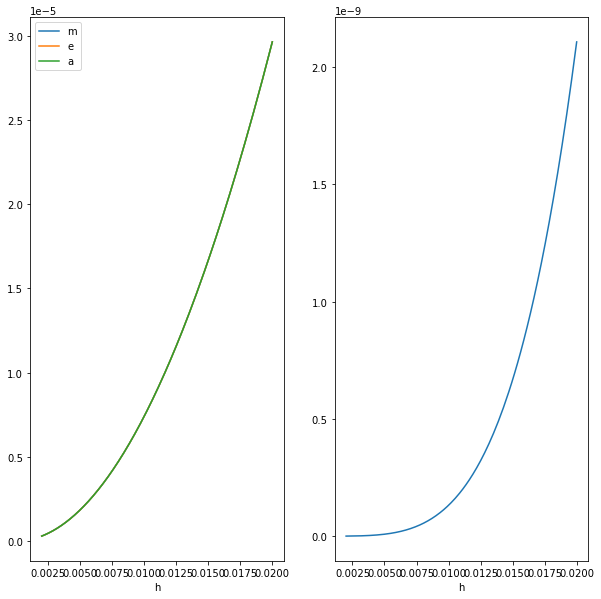

In [8]:
plt.rcParams["figure.figsize"] = (10,10)
plt.subplot(1,2,1)
plt.plot(H, errorleft)
plt.legend("left")
plt.plot(H, errorright)
plt.legend("right")
plt.plot(H, errormean)
plt.legend("mean")
plt.xlabel('h')

plt.subplot(1,2,2)
plt.plot(H, errorS)
plt.xlabel('h')

plt.show()

In [ ]:
'''
Заключение

Из графиков видно, что нет существенной разницы
использовать правую, левую, среднию формулу или формулу тропеции.
Фопмула Симпсона показывает более хорошие результаты, причем значительно быстрее

'''